# Universidad de O'Higgins

## Escuela de Ingeniería
## COM4402: Introducción a Inteligencia Artificial

### **Tarea 2: Clasificación de Calidad de Vino**

### Estudiante: Luis Miranda De la Guarda

El objetivo de esta tarea es analizar, visualizar y clasificar datos usando las bibliotecas de software pandas, numpy, matplotlib y seaborn, las cuales serán utilizadas en el curso. Se usará el conjunto de datos Wine Quality Data Set, el cual forma parte del UC Irvine Machine Learning Repository. El conjunto de datos contiene 11 características fisicoquímicas medidas para cada muestra de vino. El conjunto de datos contiene 12 columnas: las primeras 11 son las características y la última es la calidad del vino (un número entre 0 y 10). Se entrega un archivo llamado winequality-all.csv que contiene todas las muestras de vino.

### Paso 0: Importación de librerías

In [21]:
# Importación de librerías
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix


# Definir el filtro para ignorar todos los tipos de warning
warnings.filterwarnings("ignore")

# Para evitar un warning molesto
pd.options.mode.chained_assignment = None

In [22]:
# (Opcional) Montando Google Drive al Google Colab (Jupyter Notebook)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### De aquí en adelante empezará su implementación.

# Parte 1: Visualización y análisis de datos



### 1.1 Leer el conjunto de datos winequality-all.csv, usando la función pd.read_csv()

In [23]:
# Obteniendo el archivo de datos de Google Drive o de un acceso local
ruta = '/content/drive/MyDrive/Colab Notebooks/Tareas_IA/Tarea 2/winequality-all.csv'
data_all = pd.read_csv(ruta,sep=';')
data_all

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [24]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


### 1.2  Se definirán dos clases para las muestras de vino: *calidad alta* y *calidad baja*. Generar una nueva columna que contenga la clase de las muestras. Para lograr esto, se debe crear una nueva columna llamada 'class', la cual debe tener valor 'high' (calidad alta) cuando quality>=6, y valor 'low' (calidad baja) en caso contrario. Luego, eliminar la columna 'quality'.

In [25]:
# Crear una nueva columna llamada 'class' con valores 'high' o 'low' dependiendo de la calidad
data_all['class'] = data_all.apply(lambda row: 'high' if row['quality'] >= 6 else 'low', axis=1)

# Eliminar la columna 'quality'
data_all.drop('quality', axis=1, inplace=True)
data_all

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,low
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,high
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,low
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,high
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,high


### 1.3 Separar los datos en dos subconjuntos: uno con los datos de la clase calidad alta *high* y otro con los de la clase calidad baja *low*

In [26]:
# Separar los datos en dos conjuntos diferentes
high_data = data_all.groupby('class').get_group('high')
low_data = data_all.groupby('class').get_group('low')
print('Cantidad de vinos calidad high:\t', high_data.shape[0])
print('Cantidad de vinos calidad low:\t', low_data.shape[0])

Cantidad de vinos calidad high:	 4113
Cantidad de vinos calidad low:	 2384


### 1.4 Para cada característica, generar histogramas para los datos de la clase de calidad alta y los de la clase de calidad baja. Para cada característica, ambos histogramas deben dibujarse superpuestos, es decir, usando un mismo gráfico. Para esto, se recomienda usar **plt.hist()** con alpha=0.8.

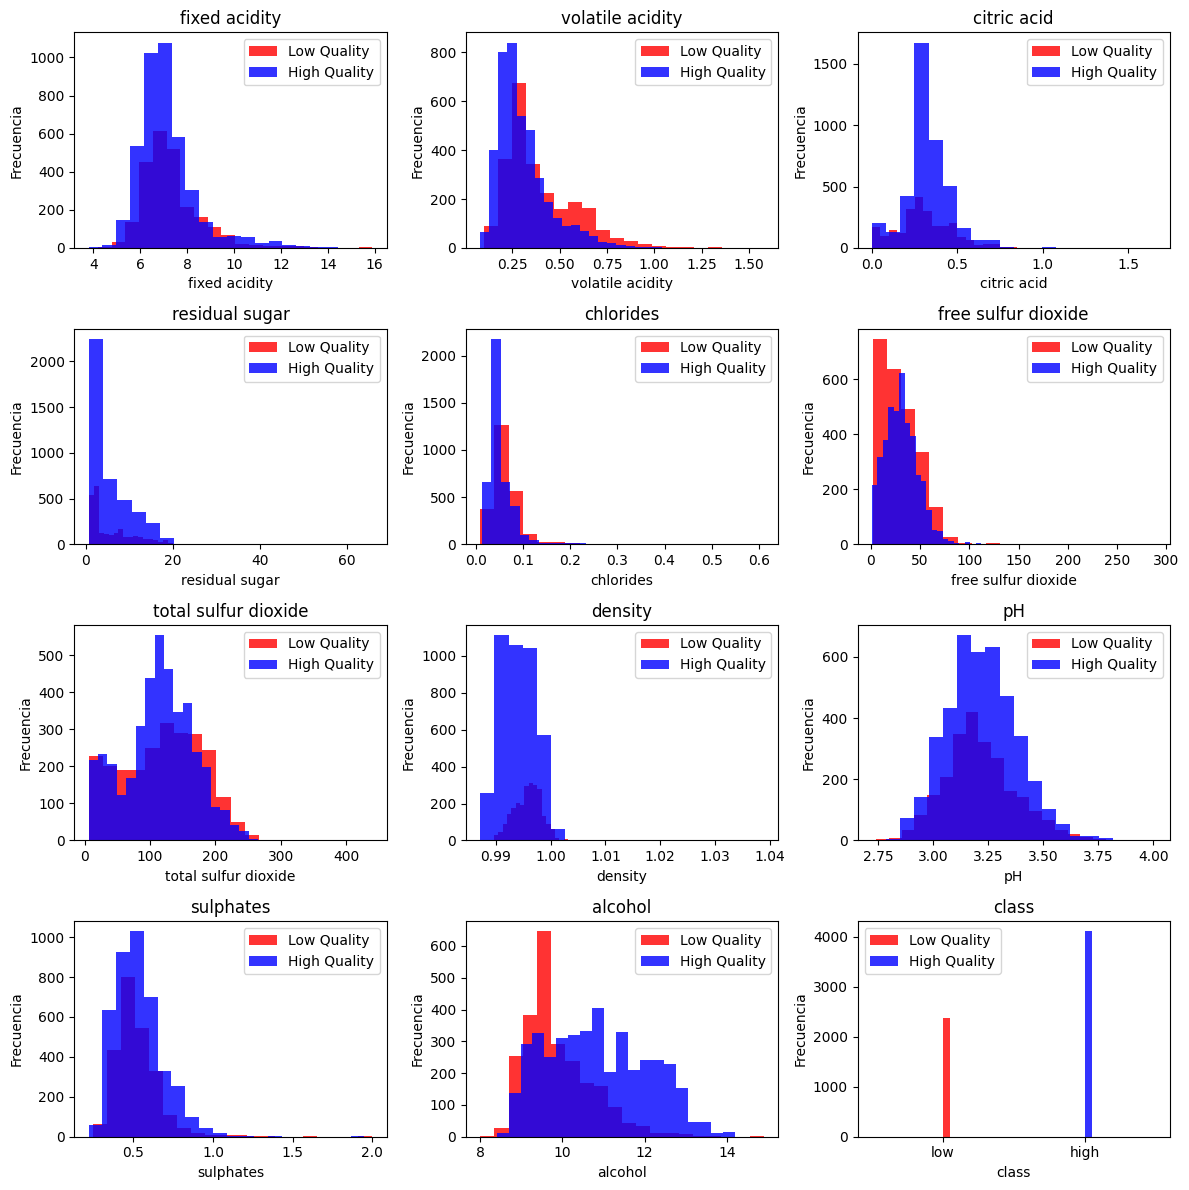

In [27]:
fig, axs = plt.subplots(4, 3, figsize=(12, 12))
axs = axs.flatten()

for i, col in enumerate(high_data.columns):
    axs[i].hist(low_data[col], bins=20, alpha=0.8, color='red', label='Low Quality')
    axs[i].hist(high_data[col], bins=20, alpha=0.8, color='blue', label='High Quality')
    axs[i].set_title(col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frecuencia')
    axs[i].legend()

plt.tight_layout()
plt.show()


### 1.5 Calcular y graficar la matriz de correlación de los características usando el valor absoluto de éstas. Incluir en este análisis la clase, codificando la clase calidad baja como 0 y la clase calidad alta como 1. Se debe usar como base la función de correlación existente en pandas. Para graficar se debe usar la función **sns.heatmap( )** de seaborn

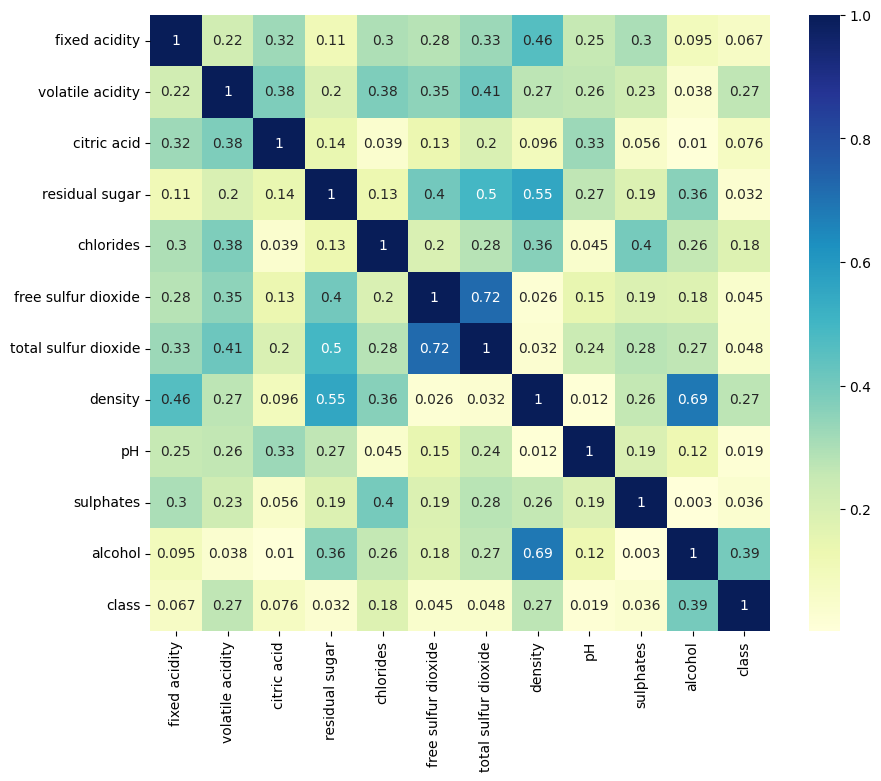

In [28]:
# Codificar clase
data_all['class'] = data_all['class'].apply(lambda q: 1 if q == 'high' else 0)

# Calcular matriz de correlación
corr_matrix = data_all.corr().abs()

# Graficar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

### 1.6 Indicar por orden cuáles son las características más correlacionadas con la clase

In [29]:
# Ordenando las correlaciones con la clase y mostrando los resultados.
data_sorted = data_all.sort_values(by='class')

corr_matrix = data_sorted.corrwith(data_sorted['class']).abs().sort_values(ascending=False)

print("Características más correlacionadas con 'class':")
print(corr_matrix[1:])

Características más correlacionadas con 'class':
alcohol                 0.394676
density                 0.268876
volatile acidity        0.267046
chlorides               0.181908
citric acid             0.075739
fixed acidity           0.067354
total sulfur dioxide    0.047585
free sulfur dioxide     0.044819
sulphates               0.035807
residual sugar          0.032484
pH                      0.018842
dtype: float64


### 1.7 Indicar por orden cuáles son los 5 pares de características más correlacionadas entre sí

In [30]:
# Nombres de las características
feature_names = data_all.columns.to_list()

# Calculamos la matriz de correlacion de los datos
correlation_matrix = np.array(data_all.corr().abs().T)

# Ignoramos la varianza de cada característica en sí misma
np.fill_diagonal(correlation_matrix, 0)

# Obtenemos los nombres de los 5 pares de características más relacionadas entre sí
pairs = []
for i in range(5):
    max_value = np.max(np.triu(correlation_matrix))
    row, col = np.where(correlation_matrix == max_value)
    feature_pair = (feature_names[row[0]], feature_names[col[0]])
    pairs.append((feature_pair, max_value))
    correlation_matrix[row[0], col[0]] = 0
    correlation_matrix[col[0], row[0]] = 0

# Ordenamos los pares de características por su valor de covarianza (de mayor a menor)
pairs.sort(key=lambda x: x[1], reverse=True)

# Imprimimos los pares de características más relacionadas
for i in range(len(pairs)):
    feature_pair = pairs[i][0]
    covariance_value = pairs[i][1]
    print("Pareja de características {}: {} y {}: {}".format(i+1, feature_pair[0], feature_pair[1], covariance_value))


Pareja de características 1: free sulfur dioxide y total sulfur dioxide: 0.720934081378524
Pareja de características 2: density y alcohol: 0.6867454216820781
Pareja de características 3: residual sugar y density: 0.5525169502932384
Pareja de características 4: residual sugar y total sulfur dioxide: 0.495481587006647
Pareja de características 5: fixed acidity y density: 0.45890998228056823


### 1.8 Graficar las dos características distintas más correlacionadas en un *scatter plot* (gráfico de dispersión).

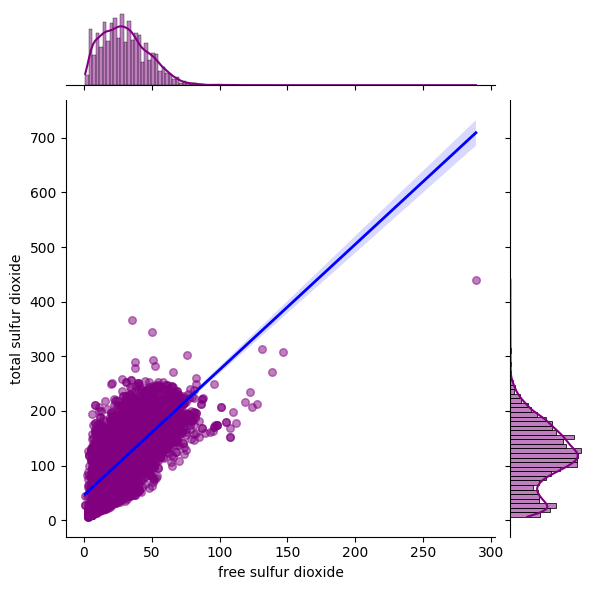

In [31]:
# Crear el gráfico de puntos con histogramas en los ejes x e y y la línea de regresión
sns.jointplot(data=data_all, x='free sulfur dioxide', y='total sulfur dioxide', kind='reg', color='purple', 
              line_kws={'linewidth': 2, 'color': 'blue'}, scatter_kws={'s':30, 'color': 'purple', 'alpha': 0.5})

# Mostrar el gráfico
plt.show()


### 1.9 Indicar por orden cuáles son los 5 pares de características menos correlacionadas entre sí.

In [32]:
# Obtenemos los nombres de los 5 pares de características menos relacionadas entre sí
pairs = []
for i in range(5):
    min_value = np.min(np.ma.masked_equal(np.triu(correlation_matrix), 0))
    row, col = np.where(correlation_matrix == min_value)
    feature_pair = (feature_names[row[0]], feature_names[col[0]])
    pairs.append((feature_pair, min_value))
    correlation_matrix[row[0], col[0]] = 1
    correlation_matrix[col[0], row[0]] = 1

# Ordenamos los pares de características por su valor de correlación (de menor a mayor)
pairs.sort(key=lambda x: x[1])

# Imprimimos los pares de características menos relacionadas
for i in range(len(pairs)):
    feature_pair = pairs[i][0]
    correlation_value = pairs[i][1]
    print("Pareja de características {}: {} y {}: {}".format(i+1, feature_pair[0], feature_pair[1], correlation_value))


Pareja de características 1: sulphates y alcohol: 0.0030291949427626395
Pareja de características 2: citric acid y alcohol: 0.010493492171301771
Pareja de características 3: density y pH: 0.011686080687331476
Pareja de características 4: pH y class: 0.018842278506904
Pareja de características 5: free sulfur dioxide y density: 0.025716842144469714


### 1.10 Graficar las dos características menos correlacionadas en un *scatter plot*.

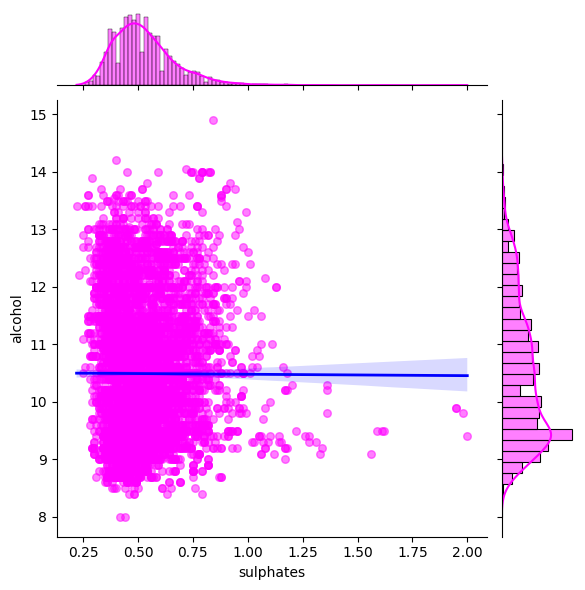

In [33]:
# Crear el gráfico de puntos con histogramas en los ejes x e y y la línea de regresión
sns.jointplot(data=data_all, x='sulphates', y='alcohol', kind='reg', color='magenta', 
              line_kws={'linewidth': 2, 'color': 'blue'}, scatter_kws={'s':30, 'color': 'magenta', 'alpha': 0.5})

# Mostrar el gráfico
plt.show()


# Parte 2: Clasificación


### 2.1 Dividir la base de datos en 2 conjuntos representativos: entrenamiento (80%) y validación (20%). Compruebe la representatividad de estos, verificando si la proporción de ambas clases se mantiene cercana a la proporción del conjunto completo. Se recomienda usar la función **train_test_split()** para hacer la división.

In [34]:
# Definimos nuestras variables predictoras (X) y la variable objetivo (y) 
X = data_all.drop('class', axis=1) 
y = data_all['class'] 

# Dividimos los datos en un conjunto de entrenamiento (80%) y otro de validación (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificamos si la proporción de ambas clases se mantiene cercana a la proporción del conjunto completo
prop_total = y.mean()
prop_train = y_train.mean()
prop_val = y_val.mean()

print(f'Proporción de la clase positiva en el conjunto completo: {prop_total:.2%}')
print(f'Proporción de la clase positiva en el conjunto de entrenamiento: {prop_train:.2%}')
print(f'Proporción de la clase positiva en el conjunto de validación: {prop_val:.2%}')

Proporción de la clase positiva en el conjunto completo: 63.31%
Proporción de la clase positiva en el conjunto de entrenamiento: 62.81%
Proporción de la clase positiva en el conjunto de validación: 65.31%


### 2.2 Entrene el modelo de clasificación **LogisticRegression()**, usando las variables por defecto (función de pérdida L2), y reporte:

*   El accuracy de entrenamiento y validación obtenido
*   El parámetro *intercept* de la regresión
*   Los coeficientes de las variables/características
*   La matriz de confusión de entrenamiento y validación



In [35]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Esta funcion grafica la matriz de confusion.
    Se puede aplicar normalizacion cambiando el parametro a normalize =True `.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiquetas Verdaderas')
    plt.xlabel('Etiquetas Predichas')
    plt.show()

def entrenar_modelo(modelo_log, X_train, X_val, y_train, y_val):
    """
    Esta funcion entrena y prueba el desempeño de un modelo de aprendizaje.
    """
    # Entrenamos el modelo con los datos de entrenamiento
    modelo_log.fit(X_train, y_train)

    # Hacemos predicciones con los conjuntos de entrenamiento y validación
    pred_train = modelo_log.predict(X_train)
    pred_val = modelo_log.predict(X_val)

    # Evaluamos la precisión del modelo en los conjuntos de entrenamiento y validación
    acc_train = accuracy_score(y_train, pred_train)
    acc_val = accuracy_score(y_val, pred_val)
    print('-'*70)
    print(f'Accuracy en el conjunto de entrenamiento:\t{acc_train:.2%}')
    print(f'Accuracy en el conjunto de validación:  \t{acc_val:.2%}')
    print('-'*70)

    # Obtenemos el parámetro de intercepción y los coeficientes de las variables/características
    intercep = modelo_log.intercept_
    coef = modelo_log.coef_

    # Creamos una tabla con los coeficientes de cada característica
    coef_df = pd.DataFrame({'feature': X_train.columns, 'coef': coef[0]})

    # Mostramos la tabla de coeficientes
    print(f'Parámetro de intercepción: {intercep}\n')
    print('Coeficientes de las variables/características:')
    print(coef_df)
    print('-'*70)

    # Obtenemos la matriz de confusión de los conjuntos de entrenamiento y validación
    cm_train = confusion_matrix(y_train, pred_train)
    cm_val = confusion_matrix(y_val, pred_val)

    print('Matriz de confusión del conjunto de entrenamiento:')
    print(cm_train)
    # Graficamos la matriz de confusión del conjunto de entrenamiento
    plot_confusion_matrix(cm_train, classes=['clase 0', 'clase 1'])
    print('-'*70)

    print('Matriz de confusión del conjunto de validación:')
    print(cm_val)
    # Graficamos la matriz de confusión del conjunto de validación
    plot_confusion_matrix(cm_val, classes=['clase 0', 'clase 1'])
    print('-'*70)

## Entrenamiento Modelos 

----------------------------------------------------------------------
Accuracy en el conjunto de entrenamiento:	74.22%
Accuracy en el conjunto de validación:  	73.15%
----------------------------------------------------------------------
Parámetro de intercepción: [-1.7527268]

Coeficientes de las variables/características:
                 feature      coef
0          fixed acidity -0.098616
1       volatile acidity -4.825566
2            citric acid -0.437381
3         residual sugar  0.051595
4              chlorides -0.443221
5    free sulfur dioxide  0.018744
6   total sulfur dioxide -0.010033
7                density -1.648390
8                     pH -1.333902
9              sulphates  2.284737
10               alcohol  0.957046
----------------------------------------------------------------------
Matriz de confusión del conjunto de entrenamiento:
[[1115  818]
 [ 522 2742]]


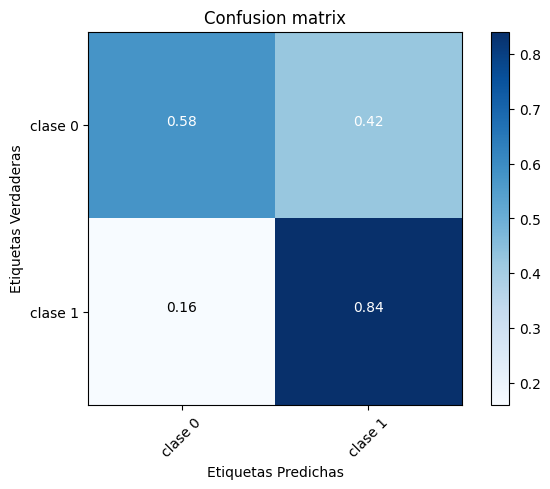

----------------------------------------------------------------------
Matriz de confusión del conjunto de validación:
[[261 190]
 [159 690]]


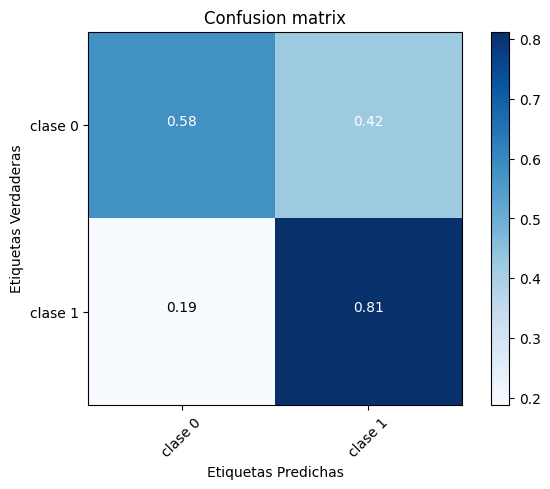

----------------------------------------------------------------------


In [36]:
modelo_1 = LogisticRegression()
entrenar_modelo(modelo_1,X_train,X_val,y_train,y_val)

### 2.2 Entrene el modelo de clasificación **LogisticRegression()**, usando las variables por defecto y sólo modificando la función de pérdida a L1, y reporte:

*   El accuracy de entrenamiento y validación obtenido
*   El parámetro *intercept* de la regresión
*   Los coeficientes de las variables/características
*   La matriz de confusión de entrenamiento y validación



----------------------------------------------------------------------
Accuracy en el conjunto de entrenamiento:	74.56%
Accuracy en el conjunto de validación:  	72.38%
----------------------------------------------------------------------
Parámetro de intercepción: [-4.59647459]

Coeficientes de las variables/características:
                 feature      coef
0          fixed acidity  0.014893
1       volatile acidity -4.714959
2            citric acid -0.685400
3         residual sugar  0.070799
4              chlorides  0.000000
5    free sulfur dioxide  0.018105
6   total sulfur dioxide -0.008254
7                density -4.663167
8                     pH  0.160316
9              sulphates  1.993330
10               alcohol  0.963475
----------------------------------------------------------------------
Matriz de confusión del conjunto de entrenamiento:
[[1122  811]
 [ 511 2753]]


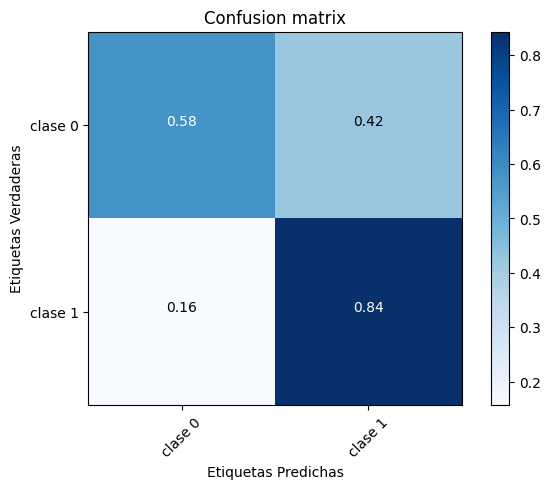

----------------------------------------------------------------------
Matriz de confusión del conjunto de validación:
[[260 191]
 [168 681]]


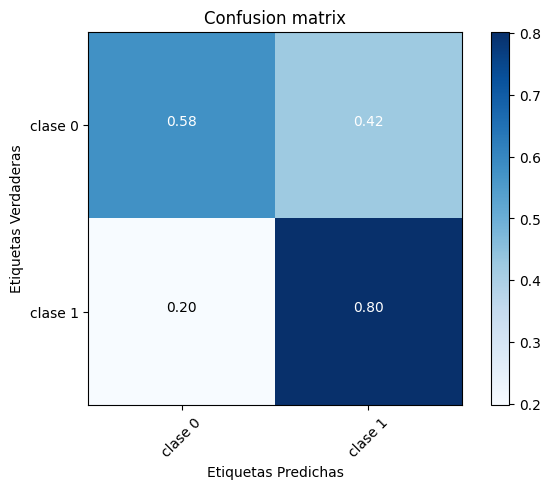

----------------------------------------------------------------------
----------------------------------------------------------------------
Accuracy en el conjunto de entrenamiento:	65.58%
Accuracy en el conjunto de validación:  	65.69%
----------------------------------------------------------------------
Parámetro de intercepción: [-0.07238886]

Coeficientes de las variables/características:
                 feature      coef
0          fixed acidity -0.290372
1       volatile acidity -0.196090
2            citric acid  0.050263
3         residual sugar  0.022046
4              chlorides -0.020470
5    free sulfur dioxide  0.018275
6   total sulfur dioxide -0.009279
7                density -0.072085
8                     pH -0.254946
9              sulphates -0.002941
10               alcohol  0.393723
----------------------------------------------------------------------
Matriz de confusión del conjunto de entrenamiento:
[[ 544 1389]
 [ 400 2864]]


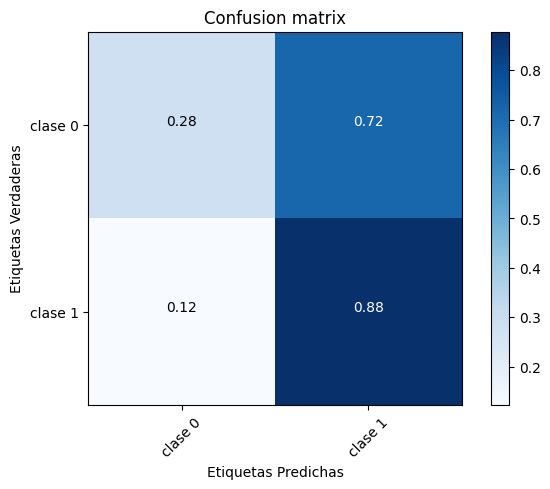

----------------------------------------------------------------------
Matriz de confusión del conjunto de validación:
[[137 314]
 [132 717]]


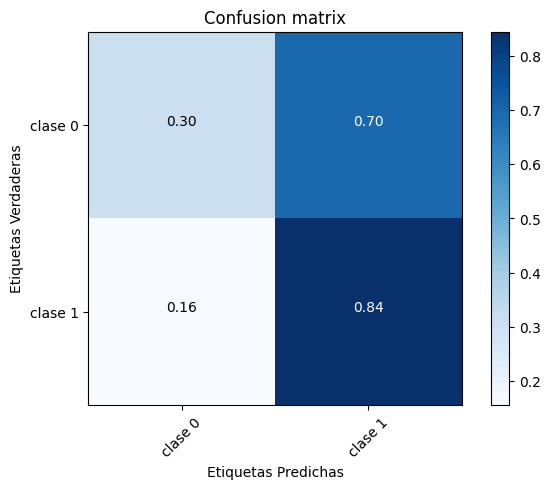

----------------------------------------------------------------------


In [37]:
modelo_2 = LogisticRegression(penalty='l1', solver='liblinear')
entrenar_modelo(modelo_2, X_train, X_val, y_train, y_val)

modelo_3 = LogisticRegression(penalty='l1', solver='saga')
entrenar_modelo(modelo_3, X_train, X_val, y_train, y_val)


### 2.3 Entrene el modelo de clasificación **LogisticRegression()**, usando las variables por defecto y sólo modificando la función de pérdida a 'elasticnet', y reporte:

*   El accuracy de entrenamiento y validación obtenido
*   El parámetro *intercept* de la regresión
*   Los coeficientes de las variables/características
*   La matriz de confusión de entrenamiento y validación



----------------------------------------------------------------------
Accuracy en el conjunto de entrenamiento:	65.58%
Accuracy en el conjunto de validación:  	65.69%
----------------------------------------------------------------------
Parámetro de intercepción: [-0.07214109]

Coeficientes de las variables/características:
                 feature      coef
0          fixed acidity -0.290546
1       volatile acidity -0.195713
2            citric acid  0.050150
3         residual sugar  0.022047
4              chlorides -0.020430
5    free sulfur dioxide  0.018273
6   total sulfur dioxide -0.009281
7                density -0.071844
8                     pH -0.254161
9              sulphates -0.002815
10               alcohol  0.393561
----------------------------------------------------------------------
Matriz de confusión del conjunto de entrenamiento:
[[ 544 1389]
 [ 400 2864]]


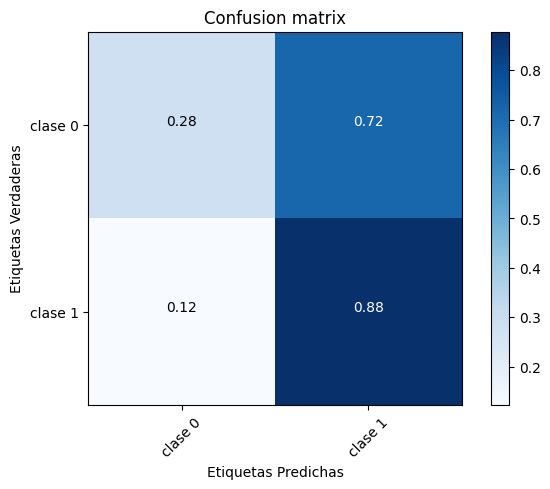

----------------------------------------------------------------------
Matriz de confusión del conjunto de validación:
[[137 314]
 [132 717]]


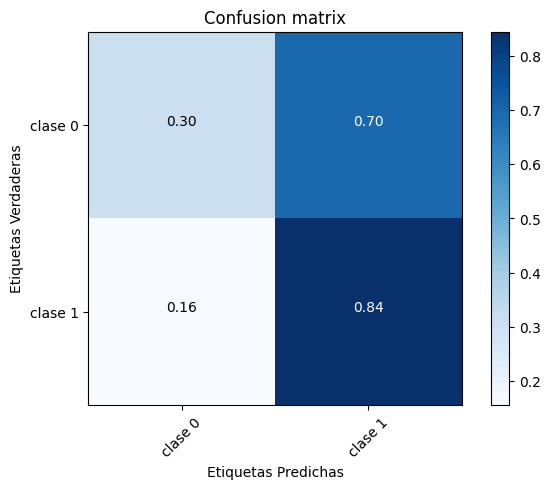

----------------------------------------------------------------------
----------------------------------------------------------------------
Accuracy en el conjunto de entrenamiento:	65.56%
Accuracy en el conjunto de validación:  	65.62%
----------------------------------------------------------------------
Parámetro de intercepción: [-0.07220308]

Coeficientes de las variables/características:
                 feature      coef
0          fixed acidity -0.290685
1       volatile acidity -0.197310
2            citric acid  0.051599
3         residual sugar  0.022137
4              chlorides -0.022040
5    free sulfur dioxide  0.018278
6   total sulfur dioxide -0.009290
7                density -0.073356
8                     pH -0.255794
9              sulphates -0.004456
10               alcohol  0.394407
----------------------------------------------------------------------
Matriz de confusión del conjunto de entrenamiento:
[[ 544 1389]
 [ 401 2863]]


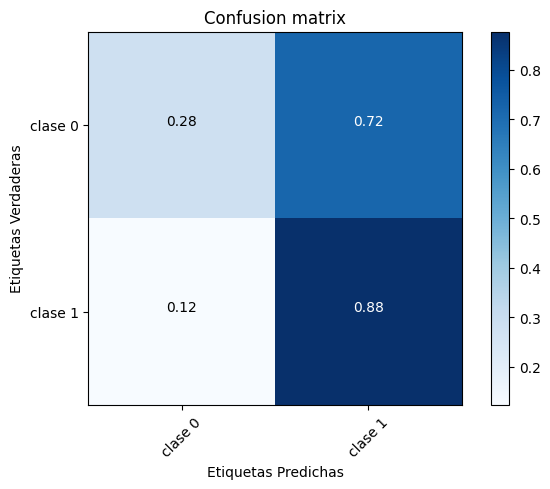

----------------------------------------------------------------------
Matriz de confusión del conjunto de validación:
[[137 314]
 [133 716]]


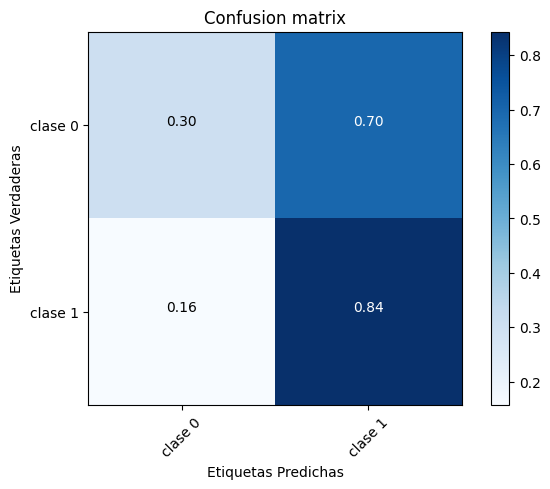

----------------------------------------------------------------------


In [38]:
modelo_4 = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=1)
entrenar_modelo(modelo_4, X_train, X_val, y_train, y_val)

modelo_5 = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0)
entrenar_modelo(modelo_5, X_train, X_val, y_train, y_val)


In [39]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Tareas_IA/Tarea 2/Tarea_2.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Tareas_IA/Tarea 2/Tarea_2.ipynb to html
[NbConvertApp] Writing 1474287 bytes to /content/drive/MyDrive/Colab Notebooks/Tareas_IA/Tarea 2/Tarea_2.html
